In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Tue, 11 Jun 2024 11:06


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"25,761,351","22,618,481","-3,142,870",-12.20%
Collector,"4,378,889","3,380,211","-998,678",-22.81%
Freeway,"28,073,146","29,222,331","1,149,185",4.09%
Ramp,"756,602","619,266","-137,336",-18.15%
Total,"58,969,988","55,840,289","-3,129,699",-5.31%


----
### Daily | By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,168,323","30,705,240","-463,083",-1.49%
Kitsap,"4,567,541","3,688,057","-879,484",-19.26%
Pierce,"13,634,217","12,858,933","-775,284",-5.69%
Snohomish,"9,599,907","8,588,059","-1,011,848",-10.54%
Total,"58,969,988","55,840,289","-3,129,699",-5.31%


----
### Daily | Scatterplots 

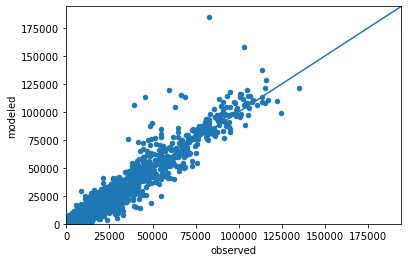

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9598138757318216


---
By County

King r^2: 0.9701245180480464
Kitsap r^2: 0.9500131524724362
Pierce r^2: 0.9416566063653837
Snohomish r^2: 0.9564569783545044


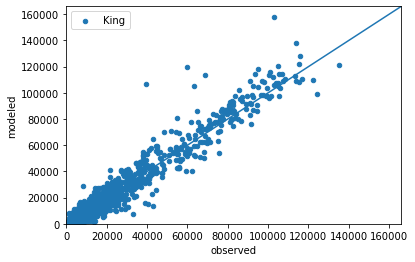

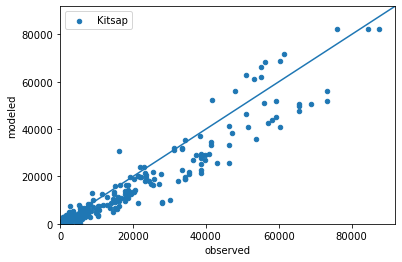

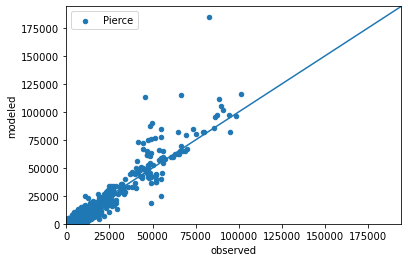

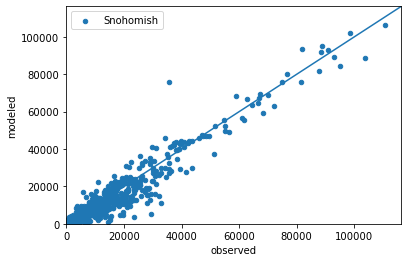

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9045160934990746
r^2 Arterial: 0.8750134729176682


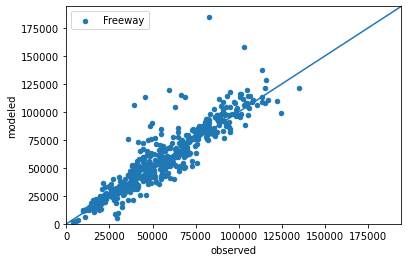

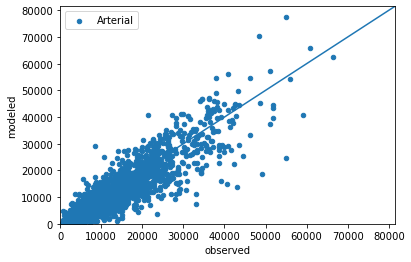

In [10]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.9004740181969447


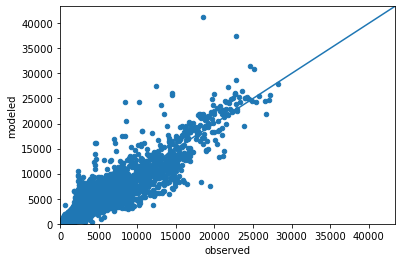

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"582,116","538,232",King,"-43,884",-7.54%
1,KENT,"552,442","504,640",King,"-47,802",-8.65%
2,SEATTLE - SOUTH OF CBD,"473,322","512,753",King,"39,431",8.33%
3,SHIP CANAL,"434,069","566,291",King,"132,222",30.46%
4,SOUTH BELLEVUE,"389,700","361,373",King,"-28,327",-7.27%
5,MILL CREEK,"387,047","382,043",King,"-5,004",-1.29%
6,KIRKLAND-REDMOND,"381,663","421,027",King,"39,364",10.31%
7,SEATTLE - NORTH,"341,251","382,947",King,"41,696",12.22%
8,TACOMA - EAST OF CBD,"300,463","347,968",Pierce,"47,505",15.81%
9,PARKLAND,"297,722","277,658",Pierce,"-20,064",-6.74%


r^2 : 0.9747135927321063


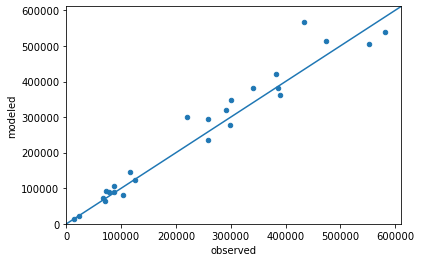

In [13]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,observed_5to20,modeled_5to20,diff,perc_diff
3,Sound Transit,"143,838","153,298","9,461",6.58%
4,Washington Ferries,"16,912","5,234","-11,678",-69.05%
1,King County Metro,"9,628","408,302","398,674","4,140.74%"
2,Kitsap Transit,"7,237","14,692","7,456",103.03%
0,Everett Transit,"4,135","3,122","-1,013",-24.49%


----
### Key Routes
#### Ferries

In [15]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,W,"1,356","1,011",-344,-25.41%
1,S,670,947,277,41.40%
2,Kingston - EdmondsE,"1,732",145,"-1,587",-91.63%
3,Bainbridge Island -,"8,857","3,165","-5,691",-64.26%
4,WSF Bremerton - Seat,"4,484",110,"-4,375",-97.56%
5,Southworth - Fauntle,365,162,-203,-55.58%
6,Vashon Island - Faun,946,"1,404",458,48.36%
7,Southworth - Vashon,239,99,-139,-58.31%
8,Point Defiance - Tah,289,148,-140,-48.59%


r^2 : 0.7375340047032718


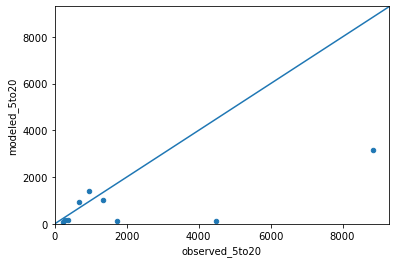

In [16]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
4,4203,Annapolis Foot Ferry,688
3,4201,Bremerton-Port Orcha,409
2,4200,Bremerton-Seattle Fa,407
0,1973,E,289
1,1975,N,136
11,5007,Point Defiance - Tah,74
10,5005,Vashon Island - Faun,72
7,5002,Bainbridge Island -,53
9,5004,Fauntleroy - Southwo,35
6,5001,Kingston - EdmondsE,10


#### Rail

In [18]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","74,630","5,247",7.56%
1,Sounder South,"15,356","12,093","-3,263",-21.25%
2,Sounder North,"1,667",15,"-1,651",-99.08%


r^2 : 0.9991601432525211


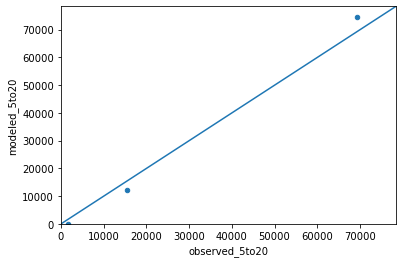

In [19]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [20]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
2,Sound Transit 550,"9,168","9,617",449,4.90%
1,First Hill Streetcar,"3,586","1,390","-2,197",-61.25%
0,SLU Streetcar,"1,703","1,084",-619,-36.35%


r^2 : 0.9773117244750914


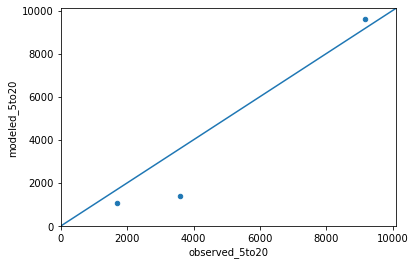

In [21]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Everett Transit: 0.907394264273597
r^2 King County Metro: 0.19738346094265555
r^2 Kitsap Transit: 0.6766806397643179
r^2 Sound Transit: 0.9944926636806174
r^2 Washington Ferries: 0.7823744246304872


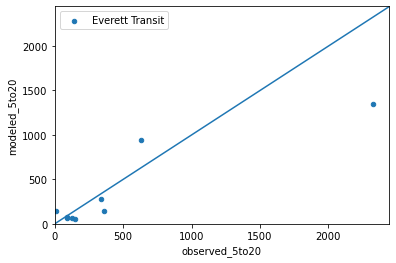

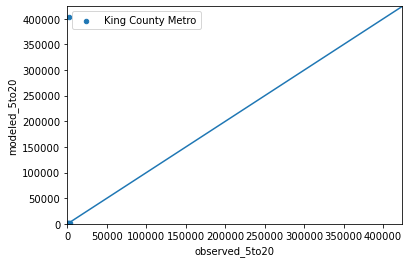

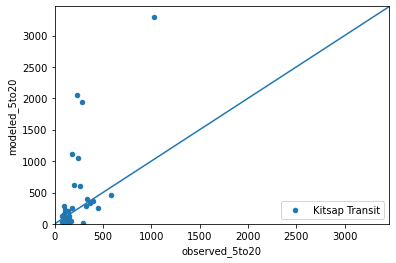

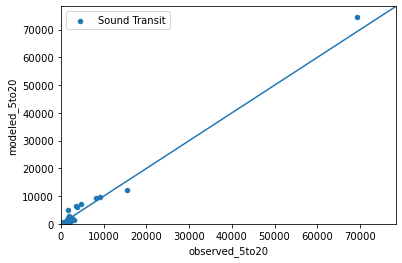

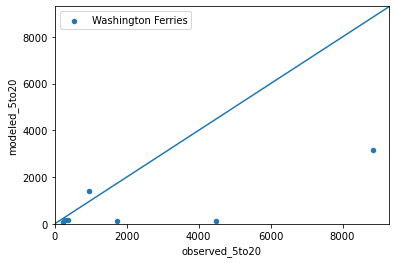

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
        lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"5,492","4,028","-1,464",-26.66%
Westlake,"7,919","8,687",768,9.70%
University St,"3,871","5,739","1,868",48.25%
Pioneer Square,"2,149","4,811","2,662",123.88%
Int'l District,"3,938","1,628","-2,310",-58.66%
Capitol Hill,"6,864","6,441",-423,-6.16%
Stadium,"1,550",563,-987,-63.66%
SODO,"1,494","3,010","1,515",101.42%
Beacon Hill,"1,922",998,-924,-48.09%


Sound Transit Station Groupings

In [24]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"5,492","4,028","-1,464",-26.66%
Capitol Hill,"6,864","6,441",-423,-6.16%
Westlake/University St,"11,790","14,426","2,636",22.36%
Pioneer Square/Int'l District,"6,087","6,439",352,5.78%
Stadium/SODO,"3,044","3,573",529,17.38%
Beacon Hill/Mount Baker,"3,588","2,080","-1,508",-42.03%
Columbia City,"1,459","1,004",-456,-31.23%
Othello/Rainier Beach,"3,156","2,470",-686,-21.73%
Tukwila Int'l Blvd,"2,057","1,730",-327,-15.89%


# Stop Transfers

### Light Rail

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.90,-99.00,99.90,-100.91%
Westlake,0.18,0.36,-0.18,-50.26%
University St,0.26,0.20,0.06,29.64%
Pioneer Square,0.44,0.16,0.28,175.42%
Int'l District,0.69,0.45,0.24,52.33%
Capitol Hill,0.07,-99.00,99.07,-100.07%
Stadium,0.29,0.12,0.17,141.32%
SODO,0.57,0.31,0.26,83.08%
Beacon Hill,0.34,0.35,-0.01,-2.31%


# Externals

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"132,000","124,676","-7,324",-5.55%
I-5 to Mount Vernon,3744,Snohomish,"64,400","57,979","-6,421",-9.97%
I-90 @ Snoqualmie Pass,3739,King,"33,800","29,764","-4,036",-11.94%
SR-507 to Yelm,3734,Pierce,"21,800","19,811","-1,989",-9.12%
SR-532 to Camano Island,3746,Snohomish,"20,700","20,219",-481,-2.32%
SR-3 to Belfair,3749,Kitsap,"18,400","16,416","-1,984",-10.78%
Hood Canal Bridge,3748,Kitsap,"17,600","16,580","-1,020",-5.80%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","8,403",-697,-7.66%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,050","6,015",-35,-0.58%


# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

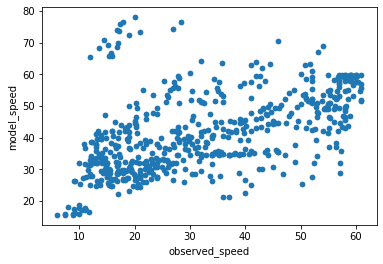

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

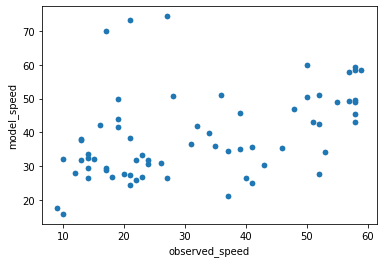

In [28]:
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [29]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,46,58
15,Everett to Seattle - SB,27,27
24,Tacoma to Seattle - NB,31,24
33,Seattle to Tacoma - SB,43,58
42,Bellevue to Lynnwood - NB,49,57
51,Lynnwood to Bellevue - SB,26,22
60,Tukwila to Bellevue - NB,28,20
69,Bellevue to Tukwila - SB,30,43
78,Auburn to Renton - NB,32,22
87,Renton to Auburn - SB,49,55


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

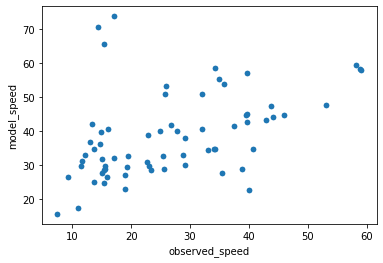

In [30]:
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [31]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,29,23
10,Everett to Seattle - SB,40,28
19,Tacoma to Seattle - NB,43,43
28,Seattle to Tacoma - SB,33,25
37,Bellevue to Lynnwood - NB,29,26
46,Lynnwood to Bellevue - SB,43,40
55,Tukwila to Bellevue - NB,30,29
64,Bellevue to Tukwila - SB,27,19
73,Auburn to Renton - NB,48,44
82,Renton to Auburn - SB,35,34
